In [55]:
# 관련 라이브러리 임포트
import torch
import numpy
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [56]:
n_dim = 2     # 2차원
# 80개의 데이터를 생성
# 차원은 2차원 => (0.5, 0.1) 이런 종류가 80개
# 중심좌표
# shuffle 임의의, 뒤섞는다
# 중심좌표를 기준으로 분포 표준편차(중심좌표에서 어느정도 거리)

# [1,1]좌표 중심 2차원 실수 , 정답(위치분면) 0
# [-1,-1]좌표 중심 2차원 실수 , 정답(위치분면) 1
# [1,-1]좌표 중심 2차원 실수 , 정답(위치분면) 2
# [-1,1]좌표 중심 2차원 실수 , 정답(위치분면) 3
x_train, y_train = make_blobs(n_samples=80, n_features=n_dim,
                              centers=[[1,1],[-1,-1],[1,-1],[-1,1]],
                              shuffle=True, cluster_std=0.3)
x_test, y_test = make_blobs(n_samples=20, n_features=n_dim,
                            centers=[[1,1],[-1,-1],[1,-1],[-1,1]],
                            shuffle=True, cluster_std=0.3)

for data in zip(x_train, y_train):
  print(data)

(array([-1.04168308, -0.96152884]), 1)
(array([-1.28459094,  0.74095804]), 3)
(array([-0.9799811 ,  1.32149325]), 3)
(array([-1.13250843, -1.10864244]), 1)
(array([-0.65789535, -0.71880746]), 1)
(array([ 1.26825229, -0.99342674]), 2)
(array([-0.75593552,  0.96760542]), 3)
(array([-1.11046238, -1.08192626]), 1)
(array([0.71275827, 1.06743042]), 0)
(array([1.39935637, 1.09066029]), 0)
(array([0.96951508, 0.30843777]), 0)
(array([ 0.69362852, -0.77702558]), 2)
(array([ 0.5279777 , -0.84680168]), 2)
(array([-0.97675418, -1.02594439]), 1)
(array([-0.81731308, -0.52675045]), 1)
(array([-1.50889254,  0.50311078]), 3)
(array([ 1.36753148, -1.02600953]), 2)
(array([ 1.10135307, -1.31853962]), 2)
(array([0.97384618, 1.44315817]), 0)
(array([-1.47815639, -1.01802694]), 1)
(array([-1.37362502, -1.08302867]), 1)
(array([-0.74598517,  1.1657526 ]), 3)
(array([-0.69958218, -1.11256052]), 1)
(array([ 0.51495637, -0.74643072]), 2)
(array([-1.11303881, -1.2607732 ]), 1)
(array([-1.28014975,  1.35427214]

In [57]:
# 정답을 2개로 축소
# 정답을 0, 1 => 0
# 정답을 2, 3 => 1
def label_map(y_, from_, to_):
  y = numpy.copy(y_)  # y_복제
  for f in from_:
    y[y_ == f] = to_
  return y

print(y_train)

y_train = label_map(y_train, [0, 1], 0)  
y_train = label_map(y_train, [2, 3], 1)
y_test = label_map(y_test, [0, 1], 0)
y_test = label_map(y_test, [2, 3], 1)

print()
print(y_train)

[1 3 3 1 1 2 3 1 0 0 0 2 2 1 1 3 2 2 0 1 1 3 1 2 1 3 2 2 3 2 0 2 3 0 0 2 0
 2 0 2 2 0 2 1 1 1 3 3 2 3 1 2 3 2 3 1 3 0 2 0 1 0 1 3 0 3 1 3 0 0 0 0 0 3
 2 0 3 1 1 3]

[0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 0
 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1
 1 0 1 0 0 1]


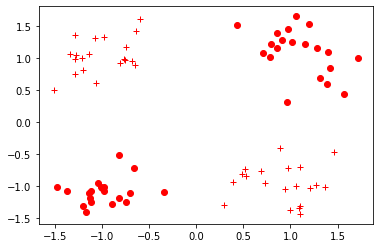

In [58]:
# 우리가 만든 클러스터 점 집합을 화면에 표현
# y가 None이면 점을 모두 '*'로 표시해라
# y가 입력되면 y값이 0이면 'o', 1이면 '+' 출력해라

def vis_data(x, y=None, c='r'):
  if y is None:
    y = [None] * len(x)
  for x_, y_ in zip(x, y):
    if y_ is None:
      plt.plot(x_[0], x_[1], '*', markerfacecolor='none', markeredgecolor=c)
    else:
      plt.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')

plt.figure()
vis_data(x_train, y_train, c='r')   # r => red
plt.show()

In [59]:
type(x_train)    # numpy 배열

numpy.ndarray

In [60]:
# pytorch의 신경망에 입력하기 위해 tensor객체로 변환한다

x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

type(x_train)
x_train

tensor([[-1.0417, -0.9615],
        [-1.2846,  0.7410],
        [-0.9800,  1.3215],
        [-1.1325, -1.1086],
        [-0.6579, -0.7188],
        [ 1.2683, -0.9934],
        [-0.7559,  0.9676],
        [-1.1105, -1.0819],
        [ 0.7128,  1.0674],
        [ 1.3994,  1.0907],
        [ 0.9695,  0.3084],
        [ 0.6936, -0.7770],
        [ 0.5280, -0.8468],
        [-0.9768, -1.0259],
        [-0.8173, -0.5268],
        [-1.5089,  0.5031],
        [ 1.3675, -1.0260],
        [ 1.1014, -1.3185],
        [ 0.9738,  1.4432],
        [-1.4782, -1.0180],
        [-1.3736, -1.0830],
        [-0.7460,  1.1658],
        [-0.6996, -1.1126],
        [ 0.5150, -0.7464],
        [-1.1130, -1.2608],
        [-1.2801,  1.3543],
        [ 1.1020, -1.4409],
        [ 0.9475, -1.0496],
        [-1.0641,  0.6068],
        [ 0.8948, -0.4072],
        [ 1.0627,  1.6485],
        [ 1.0594, -1.0051],
        [-1.0726,  1.3159],
        [ 1.0212,  1.2421],
        [ 1.1559,  1.2139],
        [ 1.0904, -1

#pyTorch에서는 일반적으로 신경망을 설계할 때 torch.nn.Module을 상속받아서 클래스를 만든다

## 보통 클래스 내에 2개의 메서드를 구현한다
<ol>
  <li>생성자 __init__ : 신경망 구성 정보</li>
  <li>순전파 forward : 신경망 구성</li>
</ol>



In [61]:


class NeuralNet(torch.nn.Module):
  def __init__(self, input_size, hidden_size):
    super(NeuralNet, self).__init__()  # 서두에 이렇게 부모 생성자를 호출
    self.input_size = input_size       # 입력 크기
    self.hidden_size = hidden_size     # 은닉층 크기
    # 일반적인 fc(fully connection) / Dense(밀집층)
    # 입력 -> 은닉
    self.linear_1 = torch.nn.Linear(self.input_size, self.hidden_size)
    self.relu = torch.nn.ReLU()    # 활성화 함수 Relu
    # 은닉 -> 출력 1개
    self.linear_2 = torch.nn.Linear(self.hidden_size, 1)
    # 정답이 0, 1이므로 시그모이드를 사용함
    self.sigmoid = torch.nn.Sigmoid()

  # 순전파 메서드
  def forward(self, input_tensor):    
    linear1 = self.linear_1(input_tensor)   # 입력값 -> 입력층 -> 은닉층
    relu = self.relu(linear1)               # 은닉층을 거친 값에 Relu적용
    linear2 = self.linear_2(relu)           # 은닉층 -> 출력층
    output = self.sigmoid(linear2)          # 출력층이 시그모이드를 통과
    return output

In [62]:
model = NeuralNet(2, 5)    # 생성자 __init__ 호출
learning_rate = 0.03
criterion = torch.nn.BCELoss()   # Binary Cross Entropy, 분류
epochs = 2000
# SGD(Stochatic Gradient Descent) : 확률적 경사하강법
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [63]:
# 학습을 하지 않은 상태에서 모델의 성능을 시험한다 
model.eval()   # 시험모드로 전환
output = model(x_test)  # => model.forward(x_test)을 호출한 것이다
output = output.squeeze() # 출력층의 차원을 1차원 감소한다
test_loss_before = criterion(output, y_test) # 오차값을 얻는다
# test_loss_before는 tensor객체이므로, 일반 Scalar값(변수값)으로 
# 얻기 위해 test_loss_before.item()으로 호출해준다
print('Before Training, test loss is {}'.format(test_loss_before.item()))

Before Training, test loss is 0.7137260437011719


In [64]:
for epoch in range(epochs):
  model.train()    # 학습모드로 전환
  optimizer.zero_grad()    # 기울기를 0으로 초기화
  train_output = model(x_train)  # model.forward(x_train)  - 순전파
  train_loss = criterion(train_output.squeeze(), y_train)  # 오차값
  if epoch % 100 == 0:
    print('Train loss at {} is {}'.format(epoch, train_loss.item()))
  train_loss.backward()      # 오차역전파 - 오차값을 각 레이어에 전달
  optimizer.step()           # 학습 - lr과 기울기로 w, b를 수정

Train loss at 0 is 0.7128744125366211
Train loss at 100 is 0.6502953767776489
Train loss at 200 is 0.5683894157409668
Train loss at 300 is 0.4675660729408264
Train loss at 400 is 0.3740798830986023
Train loss at 500 is 0.29648929834365845
Train loss at 600 is 0.240269273519516
Train loss at 700 is 0.19980479776859283
Train loss at 800 is 0.16944368183612823
Train loss at 900 is 0.14669552445411682
Train loss at 1000 is 0.12953481078147888
Train loss at 1100 is 0.11592674255371094
Train loss at 1200 is 0.10501706600189209
Train loss at 1300 is 0.09588266164064407
Train loss at 1400 is 0.08805657923221588
Train loss at 1500 is 0.08125637471675873
Train loss at 1600 is 0.07531270384788513
Train loss at 1700 is 0.07006685435771942
Train loss at 1800 is 0.0654168576002121
Train loss at 1900 is 0.06127727031707764


In [65]:
model.eval()   # 시험모드로 전환
# 시험데이터 입력값과 시험데이터 정답을 비교해서 오차를 얻는다
test_loss = criterion(model(x_test).squeeze(), y_test)
print('After Traning, test loss is {}'.format(test_loss.item()))

After Traning, test loss is 0.03600745648145676


In [66]:
# 모델을 파일로 저장한다
torch.save(model.state_dict(), './model.pt')
print('state_dict format of the model: {}'.format(model.state_dict()))

state_dict format of the model: OrderedDict([('linear_1.weight', tensor([[-1.9494,  1.2755],
        [ 1.2692, -2.1012],
        [-0.0686, -0.0297],
        [-1.0973, -0.9791],
        [-0.8216, -0.8123]])), ('linear_1.bias', tensor([-0.3383, -0.4932, -0.5184, -0.1658, -0.2347])), ('linear_2.weight', tensor([[ 2.2937,  2.4693,  0.2980, -1.3669, -0.9394]])), ('linear_2.bias', tensor([-2.2205]))])


In [67]:
# 같은 노드를 보유한 새로운 객체 생성
new_model = NeuralNet(2, 5)
# 기존 학습된 모델정보를 적용해준다
new_model.load_state_dict(torch.load('./model.pt'))
# 바로 시험에 들어간다
new_model.eval()
print('벡터 [-1, 1]이 레이블 1을 가질 확률은 {}'.format(new_model(torch.FloatTensor([-1, 1])).item()))

벡터 [-1, 1]이 레이블 1을 가질 확률은 0.9878765344619751
